In [12]:
#Import
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import json
import time
import seaborn as sns

#File paths 

file_1 = "Data/BTC_data1.csv"
file_2 = "Data/EOS-USD.csv"
file_3 = "Data/ETH_data1.csv"
file_4 = "Data/LTC_data1.csv"
file_5 = "Data/TRX-USD.csv"
file_6 = "Data/XLM-USD.csv"
file_7 = "Data/XRP-USD.csv"
file_8 = "Data/BCH-USD.csv"
file_9 = "Data/BNB-USD.csv"

#Reading stuff in

BTC = pd.DataFrame(pd.read_csv(file_1))
EOS = pd.DataFrame(pd.read_csv(file_2))
ETH = pd.DataFrame(pd.read_csv(file_3))
LTC = pd.DataFrame(pd.read_csv(file_4))
TRX = pd.DataFrame(pd.read_csv(file_5))
XLM = pd.DataFrame(pd.read_csv(file_6))
XRP = pd.DataFrame(pd.read_csv(file_7))
BCHABC = pd.DataFrame(pd.read_csv(file_8))
BNB = pd.DataFrame(pd.read_csv(file_9))


#Deleting first row in the beginning 

del BTC["Unnamed: 0"]
#del EOS["Unnamed: 0"]
del ETH["Unnamed: 0"]
del LTC["Unnamed: 0"]
#del TRX["Unnamed: 0"]
#del XLM["Unnamed: 0"]
#del XRP["Unnamed: 0"]
#del BCHABC["Unnamed: 0"]
# del BNB["Unnamed: 0"]

XRP_df = XRP.rename(columns = {"Date": "time_period_end"})
EOS_df = EOS.rename(columns = {"Date": "time_period_end"})
XLM_df = XLM.rename(columns = {"Date": "time_period_end"})
TRX_df = TRX.rename(columns = {"Date": "time_period_end"})
BCH_df = BCHABC.rename(columns = {"Date": "time_period_end"})
BNB_df = BNB.rename(columns = {"Date": "time_period_end"})

BTC.head()

,Currency,time_period_end,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,BTC,2014-01-06,732.000,1029.98765,728.0,904.000,265468.941620,399643.0
1,BTC,2014-01-13,903.297,1093.68199,720.0,835.490,528519.661236,800027.0
2,BTC,2014-01-20,835.490,973.20000,765.0,835.900,250720.703492,383336.0
3,BTC,2014-01-27,836.000,1038.15894,731.0,817.802,216735.464677,283022.0
4,BTC,2014-02-03,817.802,1022.00000,725.0,814.000,247780.206308,287406.0


In [21]:
#Merging DF together to make a superset 

crypto_ls = [BTC, ETH, XRP_df, LTC, BCH_df, BNB_df, EOS_df, XLM_df, TRX_df]

crypto_df = BTC
for x in crypto_ls[1:]:
    crypto_df = crypto_df.merge(x, on="time_period_end", how='inn')

crypto_df.tail()

#crypto_df.to_csv("merged_data_cleaned.csv")

crypto_df


,Currency_x,time_period_end,price_open_x,price_high_x,price_low_x,price_close_x,volume_traded_x,trades_count_x,Currency_y,price_open_y,...,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,BTC,2014-01-06,732.000000,1.029988e+03,7.280000e+02,904.000000,2.654689e+05,399643.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,2014-01-13,903.297000,1.093682e+03,7.200000e+02,835.490000,5.285197e+05,800027.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,2014-01-20,835.490000,9.732000e+02,7.650000e+02,835.900000,2.507207e+05,383336.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,2014-01-27,836.000000,1.038159e+03,7.310000e+02,817.802000,2.167355e+05,283022.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,2014-02-03,817.802000,1.022000e+03,7.250000e+02,814.000000,2.477802e+05,287406.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BTC,2014-02-10,796.000000,9.600000e+02,6.190000e+02,697.500000,4.420851e+05,395505.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BTC,2014-02-17,697.500000,7.616646e+02,1.000000e+02,625.000000,9.608611e+05,594805.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BTC,2014-02-24,299.722770,6.790583e+02,9.150000e+01,598.002000,7.974056e+05,673626.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BTC,2014-03-03,598.002000,6.500000e+02,1.016287e+02,554.003000,7.761374e+05,569921.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BTC,2014-03-10,565.380000,7.200000e+02,5.504200e+02,630.497000,4.015395e+05,446676.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


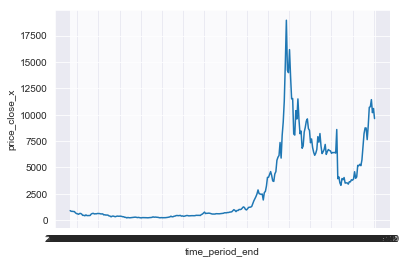

In [19]:
sns.set_style("darkgrid")
sns.lineplot(x='time_period_end', y='price_close_x', data=crypto_df)
plt.show()